In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Load all training files (user 7 data)
training_path = Path("datasets/training")

train_dfs = list()

for f in training_path.iterdir():
    if f.is_file():
        df = pd.read_csv(f)[['x', 'y']]
        train_dfs.append(df)

train_df = pd.concat(train_dfs, ignore_index=True)

centroid = train_df.mean().values  # [mean_x, mean_y]
print(centroid)

[326.34096884 353.02960656]


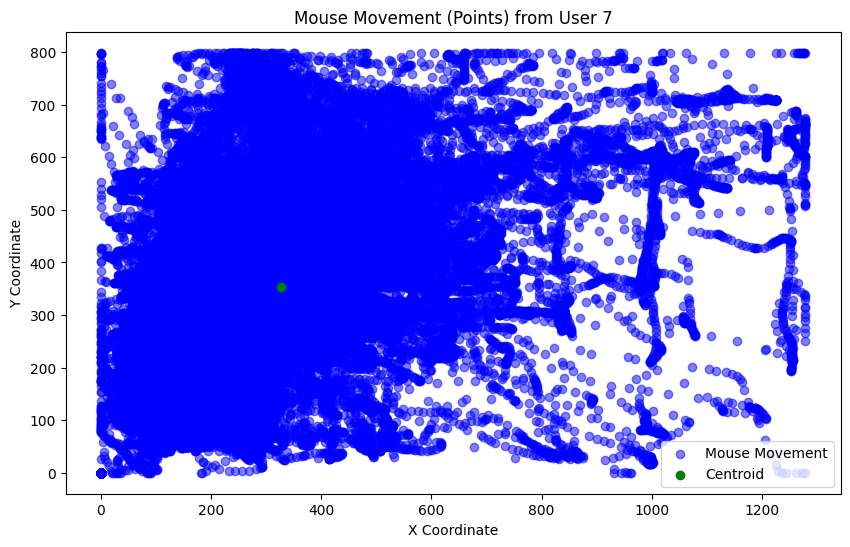

In [60]:
# Generate the plot
plt.figure(figsize=(10, 6))

# Scatter plot: individual data points
plt.scatter(df_filtered['x'], df_filtered['y'], color='blue', alpha=0.5, label='Mouse Movement')

# Scatter plot: Centroid (mean x, mean y)
plt.scatter(*centroid, color='green', alpha=1, label='Centroid')

# Add title and labels
plt.title(f"Mouse Movement (Points) from User 7")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()

# Show plot
plt.show()

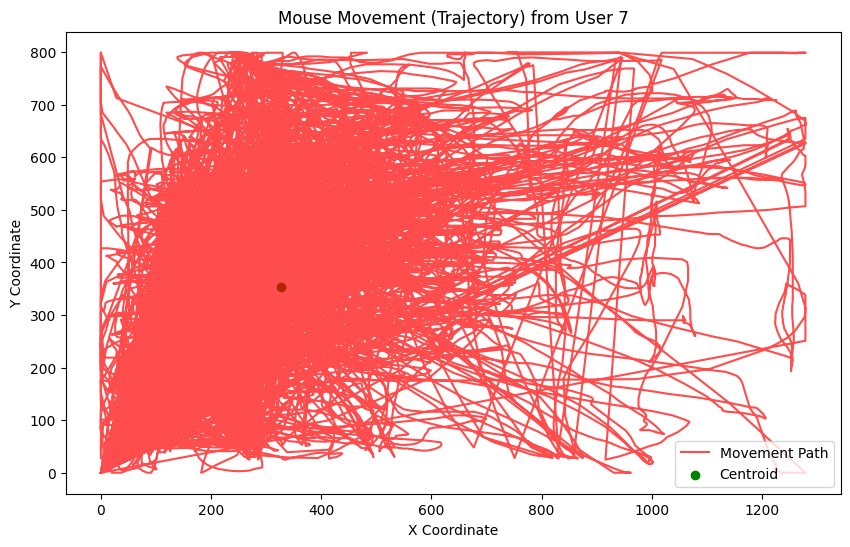

In [61]:
# Generate the plot
plt.figure(figsize=(10, 6))

# Line plot: connect the dots to show movement path
plt.plot(df_filtered['x'], df_filtered['y'], color='red', alpha=0.7, label='Movement Path')

# Scatter plot: Centroid (mean x, mean y)
plt.scatter(*centroid, color='green', alpha=1, label='Centroid')

# Add title and labels
plt.title(f"Mouse Movement (Trajectory) from User 7")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()

# Show plot
plt.show()


In [62]:
# Define a distance threshold (can be tuned based on known user data)
# For example: use 95th percentile of training distances as a threshold
train_distances = np.linalg.norm(train_df[['x', 'y']].values - centroid, axis=1)
threshold = np.percentile(train_distances, 95)
print(threshold)

548.6446239529732


In [63]:
# Evaluate test files
test_path = Path("datasets/test")
for f in test_path.iterdir():
    if f.is_file():
        df = pd.read_csv(f)[['x', 'y']]
        df_filtered = df[(df['x'] < 50000) & (df['y'] < 50000)]
        if df_filtered.empty:
            print(f"{f.name}: No valid data.")
            continue

        test_coords = df_filtered[['x', 'y']].values
        distances = np.linalg.norm(test_coords - centroid, axis=1)
        avg_distance = distances.mean()

        # Compare with threshold
        if avg_distance <= threshold:
            print(f"{f.name}: Likely belongs to user 7 (avg dist = {avg_distance:.2f})")
        else:
            print(f"{f.name}: Unlikely to be user 7 (avg dist = {avg_distance:.2f})")

session_0061629194: Likely belongs to user 7 (avg dist = 273.00)
session_0147719489: Likely belongs to user 7 (avg dist = 309.82)
session_0244684556: Likely belongs to user 7 (avg dist = 235.16)
session_0245934723: Likely belongs to user 7 (avg dist = 250.41)
session_0390975032: Likely belongs to user 7 (avg dist = 273.56)
session_0557467514: Likely belongs to user 7 (avg dist = 392.16)
session_0765935758: Likely belongs to user 7 (avg dist = 181.88)
session_0812869833: Likely belongs to user 7 (avg dist = 342.14)
session_0966487358: Likely belongs to user 7 (avg dist = 186.79)
session_0984393142: Likely belongs to user 7 (avg dist = 319.50)
session_0991252560: Likely belongs to user 7 (avg dist = 243.22)
session_1061737515: Likely belongs to user 7 (avg dist = 256.07)
session_1063325046: Likely belongs to user 7 (avg dist = 266.75)
session_1081274523: Likely belongs to user 7 (avg dist = 261.54)
session_1105710757: Likely belongs to user 7 (avg dist = 228.88)
session_1244242475: Likel

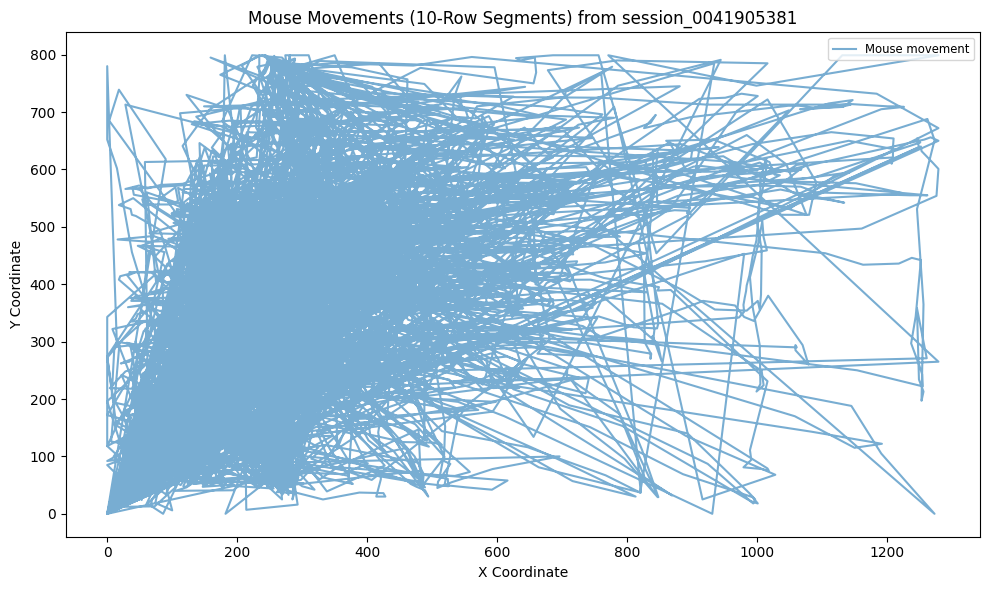

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load a single training file
training_path = Path("datasets/training")
file = next(training_path.iterdir())  # Use the first file found

# Read and filter coordinates
df = pd.read_csv(file)[['x', 'y']]
df_filtered = df[(df['x'] < 50000) & (df['y'] < 50000)].reset_index(drop=True)

# Group into 10-row movements
df_filtered['movement_id'] = df_filtered.index // 10

# Use the first point of each 10-row movement
movements = df_filtered.groupby('movement_id')[['x', 'y']].first().reset_index()

# Plot each movement as a line
plt.figure(figsize=(10, 6))

plt.plot(movements['x'], movements['y'], label='Mouse movement', alpha=0.6)
plt.title(f'Mouse Movements (10-Row Segments) from {file.name}')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()
